In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

IMG_PATH = '/workspace/sae-transfer-learning/imgs/'

### Baseline

In [27]:
baseline = pd.read_csv("/workspace/sae-transfer-learning/eval/rs-post_all.csv")
baseline.rename(columns={'Unnamed: 0':'L'}, inplace=True)
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,total_tokens_evaluated
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,262144.0
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,262144.0
2,0-2,NaN,NaN,4.935888,3.115358,15.213541,NaN,0.849520,8.957768,13.506168,1.446785,132.794434,34.878029,262144.0
3,0-3,NaN,NaN,5.234643,3.203166,13.053946,NaN,0.793775,8.992187,13.562613,1.462650,212.265137,48.625744,262144.0
4,0-4,NaN,NaN,4.974465,3.009706,14.885315,NaN,0.834555,8.945927,14.590097,1.599722,351.324097,71.443054,262144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.318004,3.034473,10.157478,NaN,-0.162926,86.214539,984.788696,11.307749,4222.083008,13903.743164,262144.0
140,11-8,NaN,NaN,12.011387,3.094152,10.491833,NaN,-0.205410,81.641319,1222.830811,14.809101,4413.660645,13764.156250,262144.0
141,11-9,NaN,NaN,11.833664,3.072817,10.092566,NaN,-0.248028,88.120010,1500.049316,16.967474,4482.791016,14590.498047,262144.0
142,11-10,NaN,NaN,11.993760,3.122844,10.124535,NaN,-0.266968,84.013306,891.071533,10.497403,3546.361328,7884.976562,262144.0


In [28]:
baseline[["ACT-Layer", "SAE-Layer"]] = baseline["L"].str.split("-", n=1, expand=True)
baseline["ACT-Layer"] = baseline["ACT-Layer"].astype(int)
baseline["SAE-Layer"] = baseline["SAE-Layer"].astype(int)
baseline = baseline.sort_values(by=["ACT-Layer", "SAE-Layer"])
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,262144.0,0,0
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,262144.0,0,1
2,0-2,NaN,NaN,4.935888,3.115358,15.213541,NaN,0.849520,8.957768,13.506168,1.446785,132.794434,34.878029,262144.0,0,2
3,0-3,NaN,NaN,5.234643,3.203166,13.053946,NaN,0.793775,8.992187,13.562613,1.462650,212.265137,48.625744,262144.0,0,3
4,0-4,NaN,NaN,4.974465,3.009706,14.885315,NaN,0.834555,8.945927,14.590097,1.599722,351.324097,71.443054,262144.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.318004,3.034473,10.157478,NaN,-0.162926,86.214539,984.788696,11.307749,4222.083008,13903.743164,262144.0,11,7
140,11-8,NaN,NaN,12.011387,3.094152,10.491833,NaN,-0.205410,81.641319,1222.830811,14.809101,4413.660645,13764.156250,262144.0,11,8
141,11-9,NaN,NaN,11.833664,3.072817,10.092566,NaN,-0.248028,88.120010,1500.049316,16.967474,4482.791016,14590.498047,262144.0,11,9
142,11-10,NaN,NaN,11.993760,3.122844,10.124535,NaN,-0.266968,84.013306,891.071533,10.497403,3546.361328,7884.976562,262144.0,11,10


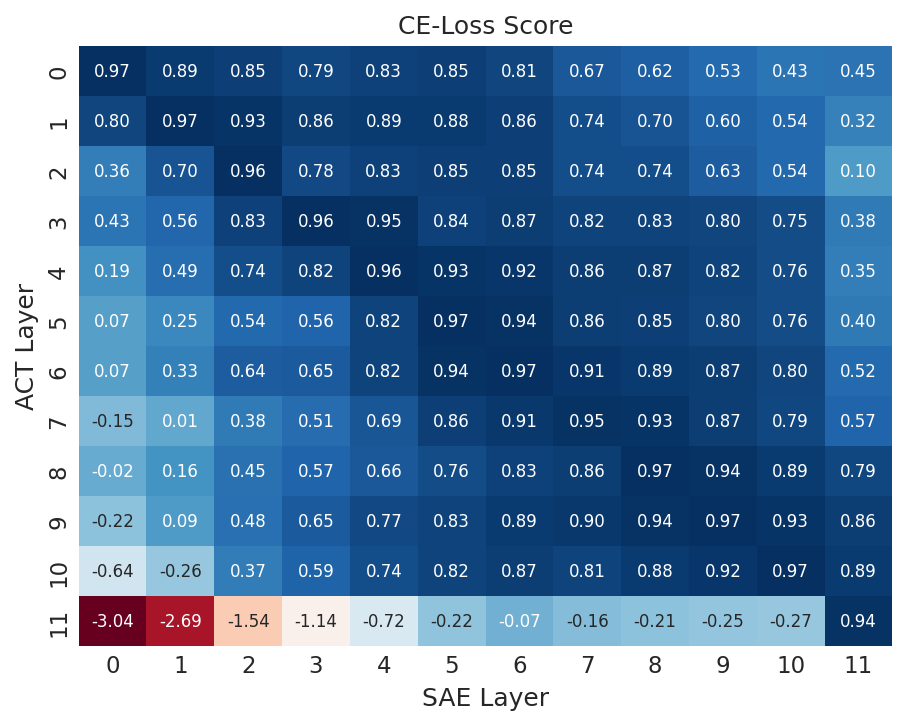

In [39]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
plt.figure(figsize=(7, 5.2), dpi=150)
sns.set_theme()
ax = sns.heatmap(
    baseline[["ce_loss_score"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.savefig(IMG_PATH + "heatmap_ce_loss_score.png")
plt.show()

In [ ]:
sns.set_theme()
ax = sns.heatmap(
    np.abs(baseline[["ce_loss_without_sae"]].to_numpy().reshape(12, 12) - baseline[["ce_loss_with_sae"]].to_numpy().reshape(12, 12)),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    cbar=False,
    # vmax=3,
    # vmin=-3
)
ax.set_title("|CE-Loss w/ SAE - CE-Loss w/o SAE|")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

In [ ]:
baseline[["ce_loss_without_sae"]].to_numpy().reshape(12, 12)

In [ ]:
sns.set_theme()

# define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharey=True, sharex=True)

ax=sns.heatmap(
    baseline[["ce_loss_score"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
    ax=axes[0],
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
# ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
# ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

ax = sns.heatmap(
    baseline[["ce_loss_with_sae"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False,
    ax=axes[1],
)
ax.set_title("CE-Loss w/ SAE")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
# ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
# ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

ax = sns.heatmap(
    np.abs(
        baseline[["ce_loss_without_sae"]].to_numpy().reshape(12, 12)
        - baseline[["ce_loss_with_sae"]].to_numpy().reshape(12, 12)
    ),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    cbar=False,
    ax=axes[2],
    # vmax=3,
    # vmin=-3
)
ax.set_title("|CE-Loss w/ SAE - CE-Loss w/o SAE|")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
# ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
# ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

### Forward

In [ ]:
fwd = pd.read_csv("/home/belerico/projects/sae-transfer-learning/eval/rs-post_transfer_forward_100003840_all.csv")
fwd.rename(columns={'Unnamed: 0':'L'}, inplace=True)
fwd

In [ ]:
fwd[["ACT-Layer", "SAE-Layer"]] = fwd["L"].str.split("-", n=1, expand=True)
fwd["ACT-Layer"] = fwd["ACT-Layer"].astype(int)
fwd["SAE-Layer"] = fwd["SAE-Layer"].astype(int)
fwd = fwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
fwd

In [ ]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    fwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("Fwd CE-Loss Score \n $i$-th SAE Layer $\leftarrow$ $(i+1)$-th ACT Layer")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

In [ ]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    np.abs(
        fwd[["ce_loss_with_sae"]].to_numpy().reshape(12, 11)
        - baseline[["ce_loss_without_sae"]].to_numpy().reshape(12, 12)[:, :-1]
    ),
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    annot_kws={"size": 8},
    cbar=False,
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

### Backward

In [ ]:
bwd = pd.read_csv("/home/belerico/projects/sae-transfer-learning/eval/rs-post_transfer_backward_100003840_all.csv")
bwd.rename(columns={'Unnamed: 0':'L'}, inplace=True)
bwd

In [ ]:
bwd[["ACT-Layer", "SAE-Layer"]] = bwd["L"].str.split("-", n=1, expand=True)
bwd["ACT-Layer"] = bwd["ACT-Layer"].astype(int)
bwd["SAE-Layer"] = bwd["SAE-Layer"].astype(int)
bwd = bwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
bwd

In [ ]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    bwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    vmax=1,
    vmin=-1,
    cbar=False,
)
ax.set_title("Bwd CE-Loss Score \n $i$-th SAE Layer $\leftarrow$ $(i-1)$-th ACT Layer")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")

In [ ]:
# TODO:
# - Add one plot for checkpoint
# - Plot/Show-table for L0 and L1

### Baseline - fwd/bwd CE-Loss

In [ ]:
df = pd.concat(
    [
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
        .iloc[1:]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_i$"}),
        fwd[(fwd["SAE-Layer"] - 1 == fwd["ACT-Layer"])]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Fwd-SAE$_i$ on ACT$_i$"}),
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] - 1]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_{i-1}$"}),
        fwd[(fwd["ACT-Layer"] == fwd["SAE-Layer"])]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Fwd-SAE$_i$ on ACT$_{i-1}$"}),
    ],
    axis=1,
)
df

In [ ]:
df = pd.concat(
    [
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
        .iloc[1:]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_i$"}),
        fwd[(fwd["SAE-Layer"] - 1 == fwd["ACT-Layer"])]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Fwd-SAE$_i$ on ACT$_i$"}),
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] - 1]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_{i-1}$"}),
        # fwd[(fwd["ACT-Layer"] == fwd["SAE-Layer"])]
        # .reset_index(drop=True)[["ce_loss_score"]]
        # .rename(columns={"ce_loss_score": "Fwd-SAE$_i$ on ACT$_{i-1}$"}),
    ],
    axis=1,
)

# Reset index to use for plotting
df = df.reset_index().melt(id_vars=["index"], var_name="Metric", value_name="SAE")

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x="index", y="SAE", hue="Metric")
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")

plt.title("Comparison of SAE on ACT")
plt.xlabel("SAE Layer")
plt.ylabel("CE-Loss Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Distances

In [3]:
import torch
from sae_lens import ActivationsStore, HookedSAETransformer
from sae_lens.config import LanguageModelSAERunnerConfig
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
cfg = LanguageModelSAERunnerConfig(
    # Data Generating Function (Model + Training Distibuion)
    model_name="pythia-160m-deduped",
    hook_name=None,
    hook_layer=None,
    dataset_path="NeelNanda/pile-small-tokenized-2b",
    is_dataset_tokenized=True,
    context_size=1024,
    streaming=True,
    # SAE Parameters
    architecture="jumprelu",
    d_in=768,
    d_sae=None,
    b_dec_init_method="zeros",
    expansion_factor=8,
    activation_fn="relu",  # relu, tanh-relu, topk
    normalize_sae_decoder=True,
    from_pretrained_path=None,
    apply_b_dec_to_input=False,
    # Activation Store Parameters
    n_batches_in_buffer=128,
    # Misc
    device=device,
    seed=42,
    dtype="float32",
    prepend_bos=False,
)

model = HookedSAETransformer.from_pretrained("pythia-160m-deduped").to(device)
activation_store = ActivationsStore.from_config(model, cfg)

/workspace/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Run name: 6144-L1-0.001-LR-0.0003-Tokens-2.000e+06
n_tokens_per_buffer (millions): 4.194304
Lower bound: n_contexts_per_buffer (millions): 0.004096
Total training steps: 488
Total wandb updates: 48
n_tokens_per_feature_sampling_window (millions): 8388.608
n_tokens_per_dead_feature_window (millions): 4194.304
We will reset the sparsity calculation 0 times.
Number tokens in sparsity calculation window: 8.19e+06


/workspace/venv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded pretrained model pythia-160m-deduped into HookedTransformer
Moving model to device:  cuda


In [8]:
n_batches = 8
batch_size = 8

activations = []

for _ in tqdm(range(n_batches)):
    batch_tokens = activation_store.get_batch_tokens(batch_size)
    with torch.no_grad():
        _, cache = model.run_with_cache(batch_tokens)

    activations.append(cache.stack_activation('resid_post').cpu())
    del cache

activations = torch.cat(activations, dim=1).reshape(model.cfg.n_layers, -1, model.cfg.d_model) # [L, N, D]

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:02<00:00,  3.03it/s]


In [9]:
activations.shape

torch.Size([12, 65536, 768])

In [10]:
# Compute the dot product between pairs of layers along dimension N
dot_products = torch.einsum('ijk,mjk->jim', activations, activations) # [N, L, L]

# Compute the norms of each layer vector
norms = torch.norm(activations, dim=-1)  # [L, N]

# Compute normalized dot products
normalized_dot_products = dot_products / torch.einsum('ik,jk->kij', norms, norms)  # [N, L, L]

# Ensure numerical stability by clamping the values in the range [-1, 1]
normalized_dot_products = torch.clamp(normalized_dot_products, -1.0, 1.0)

# Compute angular distances (arccos of the normalized dot products)
angular_distances = torch.acos(normalized_dot_products) / torch.pi * 2

# Average over dimension N
average_angular_distances = angular_distances.mean(dim=0)

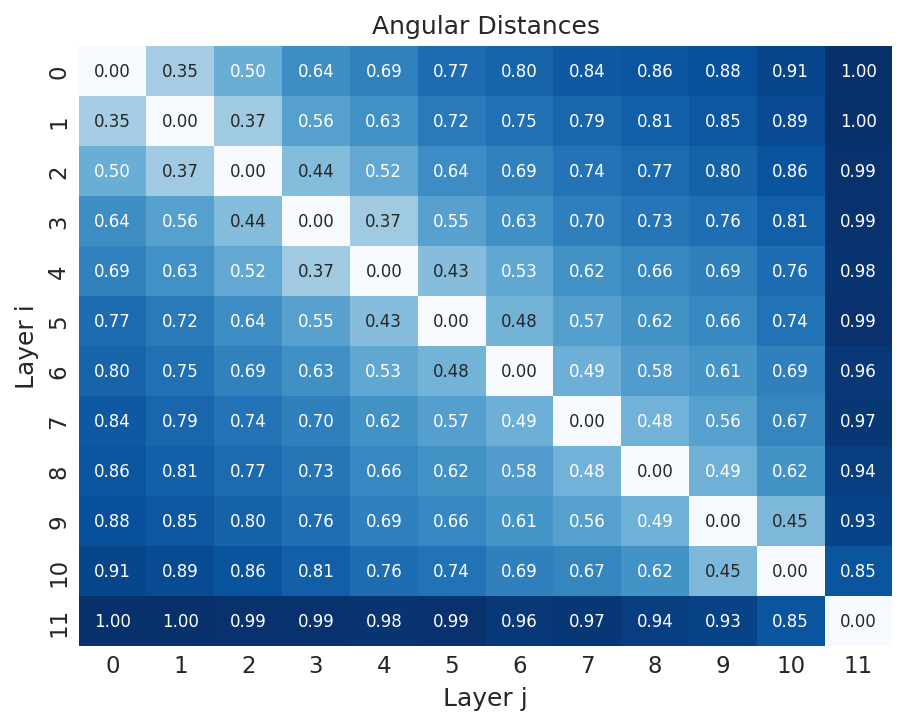

In [13]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
plt.figure(figsize=(7, 5.2), dpi=150)
sns.set_theme()
ax = sns.heatmap(
    average_angular_distances.cpu().numpy(),
    annot=True,
    fmt=".2f",
    cmap="Blues",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False
)
ax.set_title("Angular Distances")
ax.set_ylabel("Layer i")
ax.set_xlabel("Layer j")
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.savefig(IMG_PATH + "heatmap_angular_distances.png")
plt.show()

In [3]:
cache

ActivationCache with keys ['hook_embed', 'blocks.0.hook_resid_pre', 'blocks.0.ln1.hook_scale', 'blocks.0.ln1.hook_normalized', 'blocks.0.attn.hook_q', 'blocks.0.attn.hook_k', 'blocks.0.attn.hook_v', 'blocks.0.attn.hook_rot_q', 'blocks.0.attn.hook_rot_k', 'blocks.0.attn.hook_attn_scores', 'blocks.0.attn.hook_pattern', 'blocks.0.attn.hook_z', 'blocks.0.hook_attn_out', 'blocks.0.ln2.hook_scale', 'blocks.0.ln2.hook_normalized', 'blocks.0.mlp.hook_pre', 'blocks.0.mlp.hook_post', 'blocks.0.hook_mlp_out', 'blocks.0.hook_resid_post', 'blocks.1.hook_resid_pre', 'blocks.1.ln1.hook_scale', 'blocks.1.ln1.hook_normalized', 'blocks.1.attn.hook_q', 'blocks.1.attn.hook_k', 'blocks.1.attn.hook_v', 'blocks.1.attn.hook_rot_q', 'blocks.1.attn.hook_rot_k', 'blocks.1.attn.hook_attn_scores', 'blocks.1.attn.hook_pattern', 'blocks.1.attn.hook_z', 'blocks.1.hook_attn_out', 'blocks.1.ln2.hook_scale', 'blocks.1.ln2.hook_normalized', 'blocks.1.mlp.hook_pre', 'blocks.1.mlp.hook_post', 'blocks.1.hook_mlp_out', 'bloc